In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define dataset paths
training_ground_truth_path = r"C:\Users\Priyanka\Downloads\ISIC_2020_Training_GroundTruth_v2.csv"
test_data_path = r"C:\Users\Priyanka\Downloads\ISIC_2020_Test_Metadata.csv"

# Load datasets
df_training_ground_truth = pd.read_csv(training_ground_truth_path)
df_test_data = pd.read_csv(test_data_path)

# Print first few rows of each dataset to verify loading
print("Training Ground Truth Data:")
print(df_training_ground_truth.head())

print("\nTest Data:")
print(df_test_data.head())

# Example preprocessing steps

# Handle missing data in numeric columns only
numeric_columns_train = df_training_ground_truth.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_test = df_test_data.select_dtypes(include=['float64', 'int64']).columns

df_training_ground_truth[numeric_columns_train] = df_training_ground_truth[numeric_columns_train].fillna(df_training_ground_truth[numeric_columns_train].mean())
df_test_data[numeric_columns_test] = df_test_data[numeric_columns_test].fillna(df_test_data[numeric_columns_test].mean())

# Encode any categorical variables (if present)
label_encoder = LabelEncoder()

# Assuming there are categorical columns, adjust column names as needed
# Example: df_training_ground_truth['some_column'] = label_encoder.fit_transform(df_training_ground_truth['some_column'])

# Feature scaling for numeric columns in the training ground truth data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_training_ground_truth[numeric_columns_train])

# The scaled features can be used for further model training or analysis


Training Ground Truth Data:
     image_name  patient_id   lesion_id     sex  age_approx  \
0  ISIC_2637011  IP_7279968  IL_7972535    male        45.0   
1  ISIC_0015719  IP_3075186  IL_4649854  female        45.0   
2  ISIC_0052212  IP_2842074  IL_9087444  female        50.0   
3  ISIC_0068279  IP_6890425  IL_4255399  female        45.0   
4  ISIC_0074268  IP_8723313  IL_6898037  female        55.0   

  anatom_site_general_challenge diagnosis benign_malignant  target  
0                     head/neck   unknown           benign       0  
1               upper extremity   unknown           benign       0  
2               lower extremity     nevus           benign       0  
3                     head/neck   unknown           benign       0  
4               upper extremity   unknown           benign       0  

Test Data:
          image     patient  age_approx anatom_site_general     sex
0  ISIC_0052060  IP_3579794          70                 NaN    male
1  ISIC_0052349  IP_7782715    

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
sns.set(style="whitegrid")


C:\Users\Priyanka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


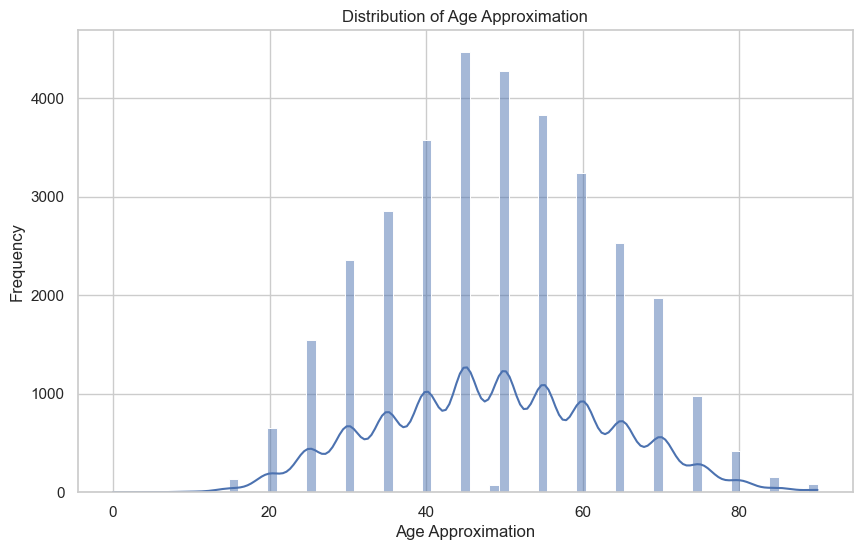

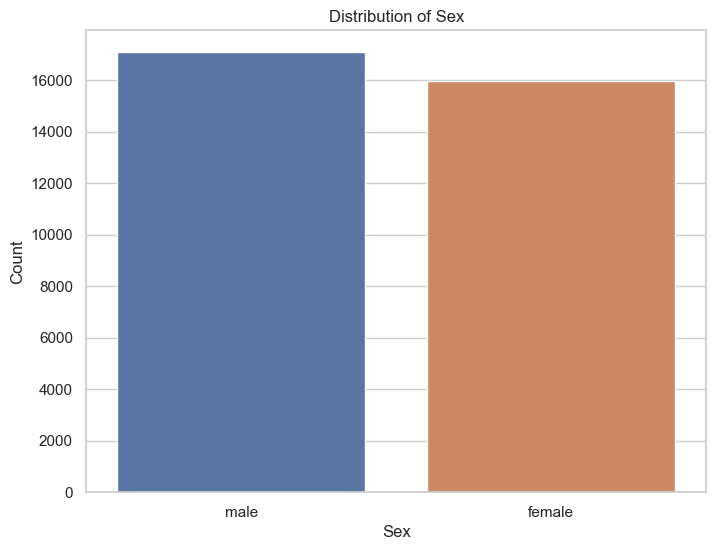

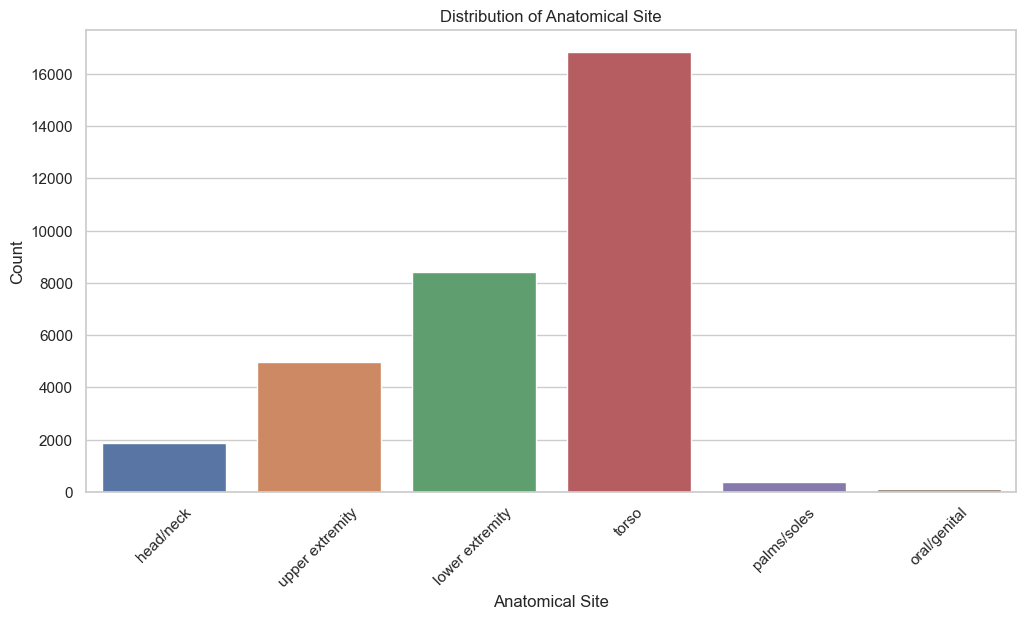

In [7]:
# Visualize the distribution of age_approx
plt.figure(figsize=(10, 6))
sns.histplot(df_training_ground_truth['age_approx'].dropna(), kde=True)
plt.title('Distribution of Age Approximation')
plt.xlabel('Age Approximation')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df_training_ground_truth)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of anatom_site_general
plt.figure(figsize=(12, 6))
sns.countplot(x='anatom_site_general_challenge', data=df_training_ground_truth)
plt.title('Distribution of Anatomical Site')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [2]:
import pandas as pd

# Define the dataset paths
training_data_path = r"C:\Users\Priyanka\Downloads\ISIC_2020_Training_GroundTruth_v2.csv"
test_data_path = r"C:\Users\Priyanka\Downloads\ISIC_2020_Test_Metadata.csv"

# Load the datasets
training_data = pd.read_csv(training_data_path)
test_data = pd.read_csv(test_data_path)

# Display the first few rows of each dataset
print("Training Data:")
print(training_data.head())

print("\nTest Data:")
print(test_data.head())


Training Data:
     image_name  patient_id   lesion_id     sex  age_approx  \
0  ISIC_2637011  IP_7279968  IL_7972535    male        45.0   
1  ISIC_0015719  IP_3075186  IL_4649854  female        45.0   
2  ISIC_0052212  IP_2842074  IL_9087444  female        50.0   
3  ISIC_0068279  IP_6890425  IL_4255399  female        45.0   
4  ISIC_0074268  IP_8723313  IL_6898037  female        55.0   

  anatom_site_general_challenge diagnosis benign_malignant  target  
0                     head/neck   unknown           benign       0  
1               upper extremity   unknown           benign       0  
2               lower extremity     nevus           benign       0  
3                     head/neck   unknown           benign       0  
4               upper extremity   unknown           benign       0  

Test Data:
          image     patient  age_approx anatom_site_general     sex
0  ISIC_0052060  IP_3579794          70                 NaN    male
1  ISIC_0052349  IP_7782715          40     

In [3]:
# Check for missing values
print(training_data.isnull().sum())


image_name                         0
patient_id                         0
lesion_id                          0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64


In [4]:
training_data = training_data.dropna()


In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
training_data['age_approx'] = imputer.fit_transform(training_data[['age_approx']])

# For categorical variables, you might want to use the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
training_data[['sex', 'anatom_site_general_challenge']] = imputer.fit_transform(
    training_data[['sex', 'anatom_site_general_challenge']]
)


C:\Users\Priyanka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


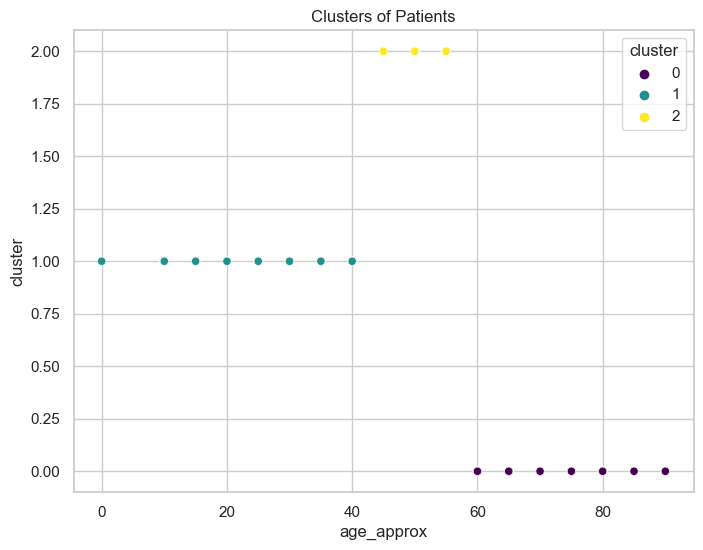

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Define the features for clustering
X = training_data[['age_approx', 'sex', 'anatom_site_general_challenge']].copy()

# Convert categorical data into numerical
X = pd.get_dummies(X, drop_first=True)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
training_data['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age_approx', y='cluster', data=training_data, hue='cluster', palette='viridis')
plt.title('Clusters of Patients')
plt.show()
